In [1]:
import napari
import zarr
import dask.array as da
from PIL import Image
from pathlib import Path
from dask.diagnostics import ProgressBar
import numpy as np
import matplotlib.pyplot as plt
from napari_animation import Animation
from glob import glob

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path_to_ome_zarr = r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_06_10_fep_hml-gfp_hs-dtom_timeseries_test/larvae_2/crop.ome.zarr/0'  
channel_axis = 1
#scale = [1, 2, 0.3295, 0.3295]
#scale = [1, 2, 0.6350906, 0.6350906]
scale = [1, 3, 0.395, 0.395]
#scale = [1, 4, 0.91, 0.91]

In [3]:
store = zarr.storage.DirectoryStore(path_to_ome_zarr)

In [5]:
viewer = napari.Viewer()
#viewer.open(store, channel_axis=channel_axis)
#viewer.open(path_to_ome_zarr, channel_axis=channel_axis)
im = da.from_zarr(store)
viewer.add_image(im, channel_axis=1)

#colors = ['green', 'yellow', 'magenta']
#contrast_limits = [[772, np.quantile(viewer.layers[0].data, 0.9999)], [0, 13307]]
for i, layer in enumerate(viewer.layers):
    layer.scale = scale
    #layer.colormap = colors[i]
    #layer.contrast_limits = contrast_limits[i]

# viewer.dims.ndisplay = 3
# viewer.camera.angles = (90.0, 0.0, 90.0)
# viewer.camera.center = (229.1757455415201, 1747.1441137045467, 503.03596759472657)
# viewer.camera.zoom = 0.39

In [18]:
im_log = da.log(im + 1)
viewer.add_image(im_log)

<Image layer 'im_log' at 0x7f7ca76a6ca0>

In [19]:
for i, layer in enumerate(viewer.layers):
    layer.scale = scale

In [27]:
np.max(viewer.layers[0].data) / 2.5

20824.8

In [26]:
np.quantile(viewer.layers[0].data, 0.9999)

25848.0

In [28]:
viewer.camera.zoom

0.39313717672797277

# Animation

In [23]:
viewer.camera.angles = (90.0, 0.0, 90.0)


In [24]:
animation = Animation(viewer)

num_steps = 100
viewer.dims.ndisplay = 3
viewer.camera.angles = (90.0, 0.0, 90.0)
animation.capture_keyframe()
viewer.camera.angles = (90.0, 90.0, 90.0)
animation.capture_keyframe(steps=num_steps)
viewer.camera.angles = (90.0, 180.0, 90.0)
animation.capture_keyframe(steps=num_steps)
viewer.camera.angles = (90.0, 270.0, 90.0)
animation.capture_keyframe(steps=num_steps)
viewer.camera.angles = (90.0, 0.0, 90.0)
animation.capture_keyframe(steps=num_steps)
animation.animate(Path(path_to_ome_zarr).parent.parent / 'render_sb_magma')



Rendering frames...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 401/401 [01:10<00:00,  5.72it/s]


# Batch run animation

In [55]:
def initialize_viewer(path_to_ome_zarr, channel_axis=1, scale=[1, 2, 0.3295, 0.3295]):
    viewer = napari.Viewer()
    viewer.open(path_to_ome_zarr, channel_axis=channel_axis)
    colors = ['green', 'magenta']
    contrast_limits = [[772, np.quantile(viewer.layers[0].data, 0.9999)], [0, 13307]]
    for i, layer in enumerate(viewer.layers):
        layer.scale = scale
        layer.colormap = colors[i]
        layer.contrast_limits = contrast_limits[i]

    viewer.dims.ndisplay = 3
    viewer.camera.angles = (90.0, 0.0, 90.0)
    viewer.camera.center = (229.1757455415201, 1747.1441137045467, 503.03596759472657)
    viewer.camera.zoom = 0.35
    
    return viewer

def create_animation(viewer):
    animation = Animation(viewer)

    num_steps = 50
    viewer.dims.ndisplay = 3
    viewer.camera.angles = (90.0, 0.0, 90.0)
    animation.capture_keyframe()
    viewer.camera.angles = (90.0, 90.0, 90.0)
    animation.capture_keyframe(steps=num_steps)
    viewer.camera.angles = (90.0, 180.0, 90.0)
    animation.capture_keyframe(steps=num_steps)
    viewer.camera.angles = (90.0, 270.0, 90.0)
    animation.capture_keyframe(steps=num_steps)
    viewer.camera.angles = (90.0, 0.0, 90.0)
    animation.capture_keyframe(steps=num_steps)
    
    return animation

In [ ]:
viewer = initialize_viewer(path_to_ome_zarr)
    animation = create_animation(viewer)
    savedir = Path(path_to_ome_zarr).parent / 'render_auto_contrast.mp4'
    print(savedir)
    animation.animate(savedir)
    viewer.close()

In [56]:
experiment_paths = [
    r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2023_03_01-dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_early-midL3_24hrs',
    r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs',
    r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_10_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs',
    r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_16_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs_mid',
    r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2023_05_03-dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_early-mid_24hrs_high_dose']

zarr_paths = []
for path in experiment_paths:
    larvae_dirs = glob(path + '/larvae*')
    for larvae_dir in larvae_dirs:
        zarr_paths.append(Path(larvae_dir) / 'im.ome.zarr')

fps = 20
for i, path in enumerate(zarr_paths):
    print(f'{i} of {len(zarr_paths)}')
    if not path.is_dir():
        continue
    viewer = initialize_viewer(path)
    animation = create_animation(viewer)
    savedir = Path(path).parent / 'render_auto_contrast.mp4'
    animation.animate(savedir, fps=20)
    viewer.close()
    

0 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:06<00:00, 33.48it/s]


1 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 35.94it/s]


2 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.31it/s]


3 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 34.14it/s]


4 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:04<00:00, 42.99it/s]


5 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 37.98it/s]


6 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 35.10it/s]


7 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:06<00:00, 33.26it/s]


8 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 34.13it/s]


9 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.28it/s]


10 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 34.21it/s]


11 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.68it/s]


12 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 35.55it/s]


13 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 35.85it/s]


14 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:06<00:00, 32.50it/s]


15 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 38.01it/s]


16 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 34.22it/s]


17 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 35.49it/s]


18 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.11it/s]


19 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 33.75it/s]


20 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:06<00:00, 32.96it/s]


21 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 33.81it/s]


22 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 34.21it/s]


23 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.77it/s]


24 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 39.25it/s]


25 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.88it/s]


26 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 34.72it/s]


27 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.58it/s]


28 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 33.68it/s]


29 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 37.28it/s]


30 of 31


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 36.33it/s]


In [53]:
viewer = initialize_viewer(path_to_ome_zarr)
animation = create_animation(viewer)
savedir = Path(path_to_ome_zarr).parent / 'render_auto_contrast.mp4'
print(savedir)
animation.animate(savedir, fps=10)
viewer.close()

/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/napari/layers/image/image.py:676: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_4/render_auto_contrast.mp4
Rendering frames...


100%|█████████████████████████████████████████| 201/201 [00:05<00:00, 38.94it/s]


In [59]:
test = ('s', 2)
print(test)

('s', 2)


In [4]:
def get_mips(dask_array, channel):
    this_data = dask_array[:, channel, :]
    mip = da.max(this_data, axis=1)
    
    return mip.compute()
    
    
    

In [8]:
# tmp
mip_dir = str(Path(path_to_ome_zarr).parent.parent.parent / "mips")

data = da.from_zarr(path_to_ome_zarr)
data = da.expand_dims(data, axis=1)
with ProgressBar():
    green_mip = get_mips(data, channel=0)

for i in range(green_mip.shape[0]):
    this_green_mip = green_mip[i]
    Image.fromarray(this_green_mip).save(mip_dir + '/mip_green' + '_' + str(i) + '.tif')

[########################################] | 100% Completed | 45.16 s


In [5]:
# save mips to tiff using PIL
#mip_dir = str(Path(path_to_ome_zarr).parent.parent / "mips")
mip_dir = str(Path(path_to_ome_zarr).parent / "mips")
Path(mip_dir).mkdir(exist_ok=True)

res = '/0'
data = da.from_zarr(path_to_ome_zarr + res)
#data = da.expand_dims(data, axis=0)
# green
with ProgressBar():
    green_mip = get_mips(data, channel=0)
    
for i in range(green_mip.shape[0]):
    this_green_mip = green_mip[i]
    Image.fromarray(this_green_mip).save(mip_dir + '/mip_green' + '_' + str(i) + '.tif')

# red
with ProgressBar():
    red_mip = get_mips(data, channel=1)

for i in range(green_mip.shape[0]):
    this_red_mip = red_mip[i]
    Image.fromarray(this_red_mip).save(mip_dir + '/mip_red' + '_' + str(i) + '.tif')


[########################################] | 100% Completed |  4.3s
[########################################] | 100% Completed |  4.2s


In [22]:
data = da.from_zarr(path_to_ome_zarr)[0]
with ProgressBar():
    green_mip = da.max(data[0], axis=0).compute()
with ProgressBar():
    red_mip = da.max(data[1], axis=0).compute()

[########################################] | 100% Completed |  9.0s
[########################################] | 100% Completed |  8.9s


In [23]:
mip_dir = r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_4'
Image.fromarray(green_mip).save(mip_dir + '/green_mip.tif')
Image.fromarray(red_mip).save(mip_dir + '/red_mip.tif')

In [16]:
mip_dir

'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_06_10_fep_hml-gfp_hs-dtom_timeseries_test/larvae_2'

In [6]:
# save mips to tiff using PIL
mip_dir = str(Path(path_to_ome_zarr).parent / "mips")

for i in range(green_mip.shape[0]):
    this_green_mip = green_mip[i]
    Image.fromarray(this_green_mip).save(mip_dir + '/mip_green' + '_' + str(i) + '.tif')
    this_red_mip = red_mip[i]
    Image.fromarray(this_red_mip).save(mip_dir + '/mip_red' + '_' + str(i) + '.tif')


In [9]:
viewer = napari.view_image(green_mip)

In [10]:
viewer.add_image(red_mip)

<Image layer 'red_mip' at 0x7fea15c749d0>

In [20]:
mip_dir = str(Path(path_to_ome_zarr).parent / "mips")
mip_dir

'/media/brandon/Data1/Brandon/fly_immune/Serenity/2022_09_20_2022_dpt-gfp_ecoli-hs-dtom_timeseries/larvae_1/mips'

In [40]:
green_mip.shape

(24, 7376, 5568)

In [44]:
red_mip.shape

()

crude gfp quantification

In [9]:
thresh = 381
green_means = np.zeros(len(green_mip))
for t in range(len(green_mip)):
    print(t)
    this_mip = green_mip[t]
    green_means[t] = np.mean(this_mip[this_mip > thresh])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


Text(0, 0.5, 'mean gfp signal (a.u.)')

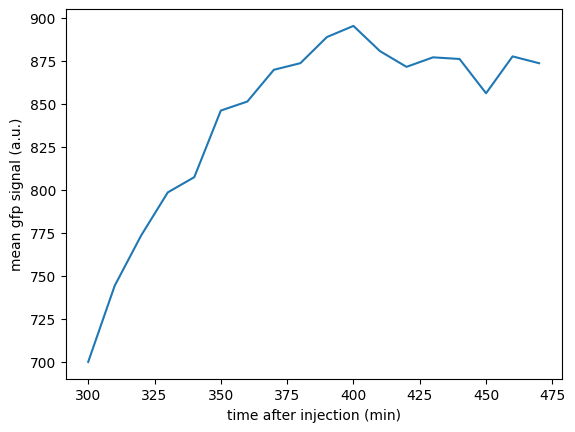

In [13]:
tvec = np.arange(5 * 60, 8 * 60, 10)
plt.plot(tvec, green_means)
plt.xlabel('time after injection (min)')
plt.ylabel('mean gfp signal (a.u.)')

In [19]:
import zarr
res = '/0'
data = da.from_zarr(path_to_ome_zarr + res)
crop = data[0, 0, 100:132, 1266:1848, 1030:1638].compute()
for i in range(crop.shape[0]):
    Image.fromarray(crop[i]).save(r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_06_10_fep_hml-gfp_hs-dtom_timeseries_test/larvae_2/lymph_gland_crop_' + str(i) + '.tif')

In [10]:
data[0,0].shape

(176, 8598, 2335)

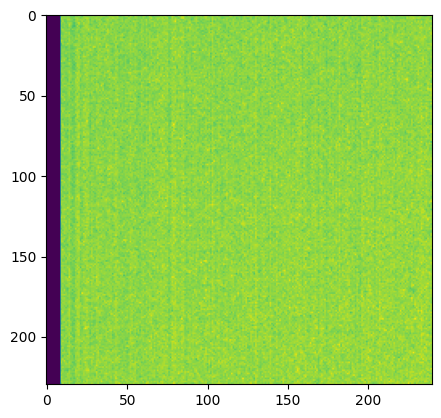

In [8]:
plt.imshow(crop[i])

In [11]:
crop[i].shape

(230, 240)

In [18]:
647 /0.395

1637.9746835443036